# Online Learning with Static-Expert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

datax = dfx.as_matrix(columns=None)
datay = dfy.as_matrix(columns=None)

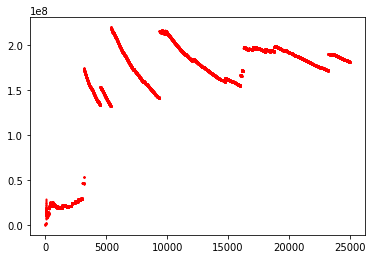

In [3]:
t=1
pt = np.ones(datax.shape[1])/datax.shape[1]
b=0.0000000001
steps = datax.shape[0]
steps = 25000
iterLoss = np.zeros(datax.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(datax[j,:] , pt))-datay[j])
    for i in range(0,datax.shape[1]):
        loss = np.square(datax[j,i]-datay[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)

lt = np.zeros(datax.shape[0])
for j in range(0,steps):
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)
    plt.plot(j,lt[j],'ro',c='r',markersize = 1)
plt.show()

## not a good approach without feature filtering